In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#
import sys
sys.path.append('/home/cat/code/gerbil/')

# 
from utils.track import track

In [22]:
# Load database 
database = pd.read_excel('/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/database.xlsx')


# Choose day you want to plot
day = 'P23'

db = database[database['Dev Day'] == day]
blocks = db['Slp filename'].to_numpy(dtype = str)

print(f"Number of files for {day}: {blocks.shape}")    # Note that this is going to include Both files twice (one for day, one for night)
      
      

Number of files for P23: (66,)


/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_00_10_24_741354_compressed_Night.npy
(28802, 16, 1, 2)
(28802, 16, 1, 2)
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_00_32_39_783450_compressed_Night.npy
(28802, 10, 1, 2)
(28802, 10, 1, 2)
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_00_54_44_481249_compressed_Night.npy
(28802, 2, 1, 2)
(28802, 2, 1, 2)
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_01_16_54_904448_compressed_Night.npy
(28802, 2, 1, 2)
(28802, 2, 1, 2)
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_01_39_06_376883_compressed_Night.npy
(28802, 207, 1, 2)
(28802, 207, 1, 2)
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_02_01_19_002918_compressed_Night.npy
(28802, 217, 1, 2)
(28802, 217, 1, 2)
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_02_23_30_823259_compressed_Night.npy


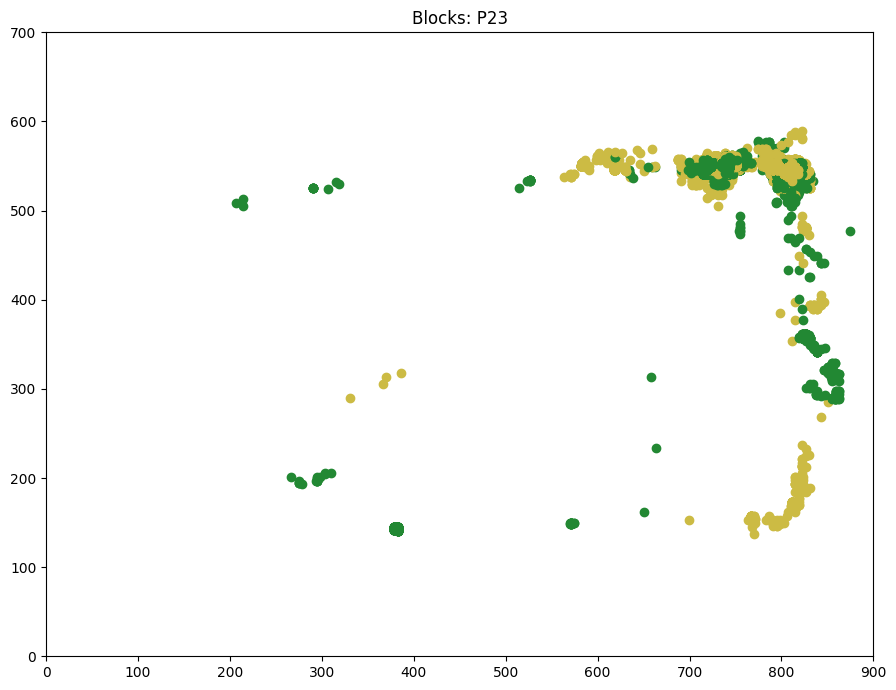

In [27]:
plt.figure(figsize = (9,7))

plt.title(f'Blocks: {day}')

plt.tight_layout()

blockss = ['block1', 'block2']
colors = ['#ccbb44', '#228833']

plt.xlim(0,900)
plt.xticks([0,100,200,300,400,500,600,700,800,900])

plt.ylim(-700,0)
plt.yticks(ticks = [-700,-600,-500,-400,-300,-200,-100,0], labels = [0,100,200,300,400,500,600,700])

root_dir = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/'
# fnames = os.listdir(root_dir)

# for i, fname in enumerate(fnames):
for i, f in enumerate(blocks):
    # fname = os.path.join(root_dir, fname)
    fname = os.path.join(root_dir,str(f))[:-3]+'npy'
    print (fname)
    
    try:
        locations = np.load(fname)
        
    except:
        print('no file')
                                
    for ((ctr, a),c) in zip((enumerate(blockss)),colors):
        
        try:
            print(locations.shape)
            plt.plot(locations[:,ctr,:,0],(-locations[:,ctr,:,1]), "o", color = c, label = a) #, linewidth = 6)
        
        except:
            print('index error')
    
plt.savefig("/home/cat/code/blocks.png", transparent=True)

/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_00_10_24_741354_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_00_32_39_783450_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_00_54_44_481249_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_01_16_54_904448_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_01_39_06_376883_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_02_01_19_002918_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_02_23_30_823259_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_02_45_46_902455_compressed_Night.slp
/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/2020_07_28_03_07_55_372616_compressed_Ni

IndexError: index 1 is out of bounds for axis 1 with size 1

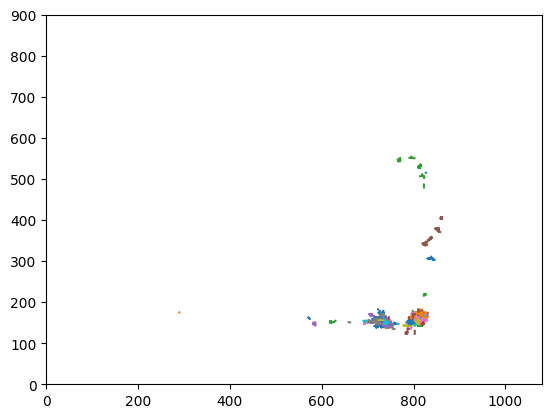

In [18]:
#
root_dir = '/mnt/b3a68699-495d-4ebb-9ab1-ac74f11c68c5/gerbil/cohort2/blocks/'
fnames = os.listdir(root_dir)

# for i, fname in enumerate(fnames):
for i, f in enumerate(blocks):
    # fname = os.path.join(root_dir, fname)
    fname = os.path.join(root_dir,str(f))
    print (fname)
    
    if os.path.exists(fname):
    
        fname_spine_out = fname.replace('.slp',".npy")
        if os.path.exists(fname_spine_out):
            continue

        t = track.Track(fname)
    
    #
    t.track_type = "blocks"
    
    # try:
    t.load_tracks()
    
    locations = t.tracks_centers
    print ("Locations: ", locations.shape)
    # locations = np.load(fname)
        
#     except:
#         print('no file')
                           
    # locations =  locations.squeeze()
    print (locations.shape)
    
    def get_clean_block(block):
    
        # REMOVE SHORT CHUNKS likely error
        vals = block.sum(1)
        min_len = 24

        #
        inside=False
        ctr=0
        if np.isnan(vals[0])==False:
            start = 0
            inside=True
            
        #
        for k in range(1,vals.shape[0],1):
            #print (inside, vals[k])
            if inside:
                if np.isnan(vals[k]):
                    if (k-start)<min_len:
                        block[start:k]=np.nan
                        ctr+=1

                    inside=False
            else:
                if np.isnan(vals[k])==False:
                    start = k
                    inside=True

        print ("removed # of chunks: ", ctr)       

        # REMOVE BIG JUMPS FROM VISUALIZATION
        # Number of pixels of movement allowed in between sequential time points
        threshold=5

        #
        dists = block[1:]-block[:-1]
        #print (block1)
        lens = np.linalg.norm(dists,axis=1)
        print (lens.shape)
        idx = np.where(lens>threshold)[0]

        for id_ in idx:
            block[id_-1:id_+1]=np.nan

        return block
            
    # plot 1st block
    block1 = get_clean_block(locations[:,0])
    plt.plot(block1[:,0],
             block1[:,1])
    
    # plot 2nd block
    block2 = get_clean_block(locations[:,1])
    plt.plot(block2[:,0],
             block2[:,1])
    
    #
    plt.xlim(0,1080)
    plt.ylim(0,900)
#plt.savefig("/home/cat/code/blocks.png", transparent=True)